<a href="https://colab.research.google.com/github/DeividiPansera/CVND_Exercises/blob/master/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução

Neste notebook, criaremos um modelo para classificar imagens a partir do dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). O dataset consiste de 10 classes de imagens: cachorros, gatos, carros, aviões etc. 

No que segue, importamos as bibliotecas necessárias para este projeto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os



# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


170500096/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


O dataset consiste em 50000 imagens para treino e 10000 imagens para teste. 

## Data exploration

A primeira coisa a ser feita é uma verifacação da distribuição das classes a serem preditas.

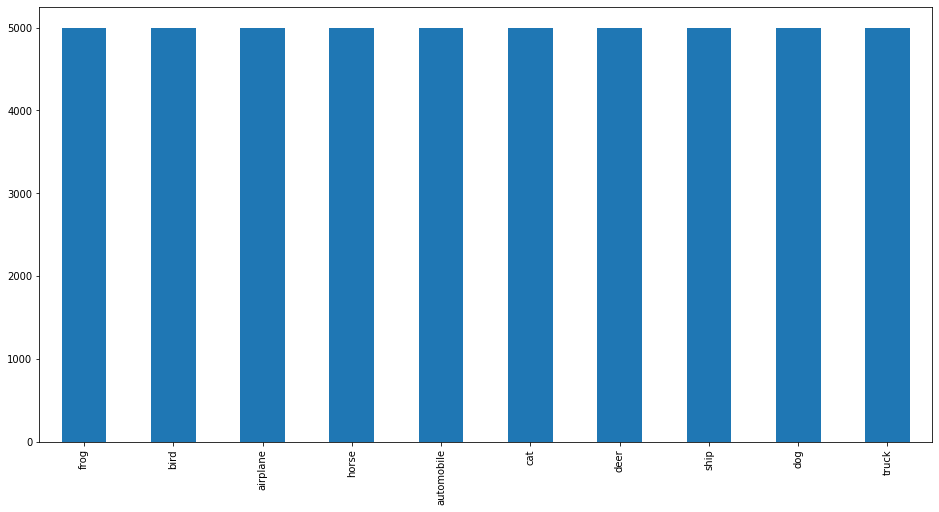

In [2]:
classes = {
  0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'
}

df = pd.DataFrame(y_train, columns = ['class']).replace(classes)
plt.figure(figsize=(16, 8))
df['class'].value_counts().head(10).plot.bar()

In [3]:
print('Label Counts: {}'.format(dict(zip(*np.unique(y_train, return_counts=True)))))

Label Counts: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


Notemos que o dataset está balanceado. Isto é bom, pois se uma das classes estivesse desproporcionada em relação às outras, teríamos um problema de *imbalanced* e isto exigiria alguns técnicas para solucionarmos o problema. 

Agora, antes de criar algum modelo, vamos plotar algumas imagens aleatórias e, em seguida, investigar para tentarmos descobrir se existe algum problema de *label* no dataset. Isto é, se existem imagens classificadas erroneamente. 

In [0]:
def stats(sample_id):
    """
    Display Stats of the image
    """

    sample_image = x_train[sample_id]
    sample_label = y_train[sample_id][0]

    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, classes[sample_label]))
    plt.axis('off')
    plt.imshow(sample_image)


Example of Image 45000:
Image - Min Value: 0 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 7 Name: horse


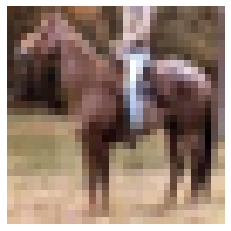

In [5]:
#Sample 1
stats(45000)


Example of Image 410:
Image - Min Value: 14 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


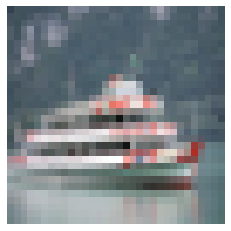

In [6]:
stats(410)


Example of Image 4:
Image - Min Value: 0 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


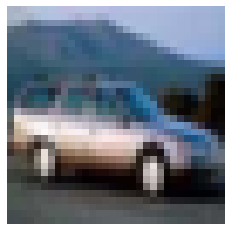

In [7]:
stats(4)

A resolução das imagens, como podemos perceber, está baixa. 

Agora, vamos analisar se as *labels* estão corretas. Para isso, foram feitas diversas plotagens de fotos aleatórias do training set. 

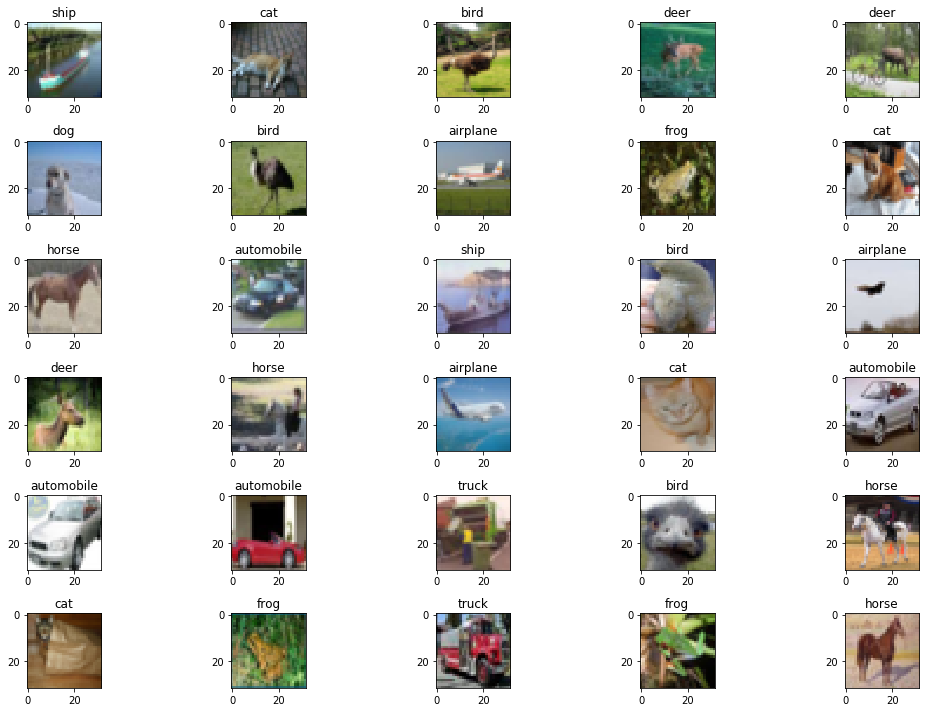

In [8]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,10))
axes_list = [item for sublist in axes for item in sublist] 

for i in np.random.randint(0,  len(x_train)-1, 30):
    ax = axes_list.pop(0)
    # define subplot
    sample = x_train[i]
    target = y_train[i][0]
    
    ax.imshow(sample)
    # plot raw pixel data
    ax.set_title(f'{classes[target]}')   
#show the figure
for ax in axes_list:
    ax.remove()

plt.tight_layout()

## Preprocessing
Redes Neurais, especialmente *Convolutional Neural Networks*, são mais rápidas se os dados estão normalizados. Para isso, no que segue, aplicamos a normalização no dataset.

In [0]:
#Converting to float and then normalising by diving by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
#OneHot For Y_train and Y_test
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


## Creating the Model

In [19]:
#Creating Model 

batch_size=256
num_classes = 10


model = Sequential()



model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))




model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))



#Last Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)       

In [0]:
#ModelCompile 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 135us/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3022 - val_acc: 0.1017
Epoch 2/20
50000/50000 [==============================] - 5s 103us/step - loss: 2.2485 - acc: 0.1330 - val_loss: 2.1652 - val_acc: 0.1801
Epoch 3/20
50000/50000 [==============================] - 5s 105us/step - loss: 2.1101 - acc: 0.1757 - val_loss: 2.0313 - val_acc: 0.1860
Epoch 4/20
50000/50000 [==============================] - 5s 104us/step - loss: 1.9986 - acc: 0.1834 - val_loss: 1.9029 - val_acc: 0.1910
Epoch 5/20
50000/50000 [==============================] - 5s 103us/step - loss: 1.9346 - acc: 0.1833 - val_loss: 1.8817 - val_acc: 0.1903
Epoch 6/20
50000/50000 [==============================] - 5s 104us/step - loss: 1.9065 - acc: 0.1885 - val_loss: 1.8594 - val_acc: 0.1983
Epoch 7/20
50000/50000 [==============================] - 5s 105us/step - loss: 1.8937 - acc: 0.1936 - val_loss: 1.8445 - 

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
history=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),steps_per_epoch=5000,
                                     epochs=20,
                                    validation_data=(x_test, y_test))
                        
                        


score = model.evaluate(x=x_test,y=y_test,verbose=1)
print('Test_loss:',score[0])
print('Test_accuracy:',score[1])

Epoch 1/20
5000/5000 [==============================] - 494s 99ms/step - loss: 1.3661 - acc: 0.4813 - val_loss: 1.0458 - val_acc: 0.6184
Epoch 2/20
5000/5000 [==============================] - 494s 99ms/step - loss: 1.0869 - acc: 0.6171 - val_loss: 0.8888 - val_acc: 0.6918
Epoch 3/20
5000/5000 [==============================] - 492s 98ms/step - loss: 0.9447 - acc: 0.6799 - val_loss: 0.7802 - val_acc: 0.7369
Epoch 4/20
5000/5000 [==============================] - 492s 98ms/step - loss: 0.8561 - acc: 0.7157 - val_loss: 0.7067 - val_acc: 0.7664
Epoch 5/20
5000/5000 [==============================] - 492s 98ms/step - loss: 0.7917 - acc: 0.7405 - val_loss: 0.6688 - val_acc: 0.7846
Epoch 6/20
5000/5000 [==============================] - 491s 98ms/step - loss: 0.7424 - acc: 0.7586 - val_loss: 0.6615 - val_acc: 0.7876
Epoch 7/20
5000/5000 [==============================] - 491s 98ms/step - loss: 0.7015 - acc: 0.7734 - val_loss: 0.6177 - val_acc: 0.8019
Epoch 8/20
5000/5000 [===================